# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [5]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper
# Import libraries
import tomotopy as tp
import little_mallet_wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [6]:
# Q2 (code)
import pandas as pd

# Load the datasets for Sanders and Trump's tweets
sanders_tweets = pd.read_csv("sanders_tweets.csv")
trump_tweets = pd.read_csv("trump_tweets.csv")

# Concatenate the datasets into a single dataframe
combined_tweets = pd.concat([sanders_tweets, trump_tweets])

# Display the combined dataframe as a table
display(combined_tweets.head())

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [48]:
# Q3 (code)
# Tip: add the following line to remove URLS and user mentions



import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize lists
training_data = []
original_texts = []
titles = []

# Define stopwords and compile regex for punctuation and numbers
stop_words = set(stopwords.words('english')) # Initialize a set of English stopwords

# Iterate through each row of the combined dataset
for index, row in combined_tweets.iterrows():
    original_text = row['Content'].lower() # Extract original text and convert it to lowercase
    original_texts.append(original_text) # Append original text to the list
    
    # Remove URLs, user mentions, and specific keywords using regular expressions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|rt", '', original_text, flags=re.MULTILINE)
    words = word_tokenize(processed_text) # Tokenize the processed text into words
    
    # Filter out stopwords and non-alphabetic characters using list comprehension
    words_filtered = [word for word in words if word not in stop_words and word.isalpha()]

    training_data.append(' '.join(words_filtered))
    # Combine the username and tweet ID and append it as a title to the titles list
    titles.append(f"{row['Username']} - {row['TweetId']}")

training_data[0]# Output the first processed text for checking the result

[nltk_data] Downloading package punkt to /Users/mykilee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mykilee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg increase minimum wage must tax rich amp raise minimum wage least'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [68]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.215070317680787
Iteration: 10	Log-likelihood: -8.816612327333274
Iteration: 20	Log-likelihood: -8.656484676123368
Iteration: 30	Log-likelihood: -8.5716307448915
Iteration: 40	Log-likelihood: -8.510036432036635
Iteration: 50	Log-likelihood: -8.462078186829734
Iteration: 60	Log-likelihood: -8.432362482210593
Iteration: 70	Log-likelihood: -8.404993381079537
Iteration: 80	Log-likelihood: -8.384460858293908
Iteration: 90	Log-likelihood: -8.370021417414748


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [54]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

jobs economy workers years wage american ever since year record

✨Topic 1✨

democrats impeachment president election house schiff trump senate nothing republican

✨Topic 2✨

democrats border amp want wall country security get would people

✨Topic 3✨

states united china trade deal president amp countries many world

✨Topic 4✨

great big thank america noh make see forward house korea

✨Topic 5✨

news fake cou joe new like biden amp trump supreme

✨Topic 6✨

must trump federal war act congress senate people government suppo

✨Topic 7✨

fbi russia trump collusion witch mueller hunt amp campaign hillary

✨Topic 8✨

news fake media amp people great much would never even

✨Topic 9✨

health care people tax americans need must pay million make

✨Topic 10✨

great thank today honor day women president amp american america

✨Topic 11✨

trump president live tonight watch join donald maga enjoy national

✨Topic 12✨

change climate energy fossil biden planet fuel j

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


Topic 0: This topic appears to focus on economic issues, such as jobs, wages, and workers, suggesting discussions related to employment, income, and labor conditions.

Topic 1: This topic revolves around political matters, particularly concerning Democrats, impeachment, elections, and the political dynamics between the presidency, Congress, and the Senate.

Topic 2: This topic is centered on border security and immigration, with discussions related to Democrats' stance on building a wall, national security concerns, and immigration policies.

Topic 3: This topic relates to international relations and trade, mentioning the United States, China, trade deals, and global economic interactions.

Topic 4: This topic expresses gratitude and positivity, focusing on appreciating great achievements, America, and the progress made in various endeavors.

Topic 5: This topic discusses media and political discourse, addressing issues such as fake news, Joe Biden, and skepticism towards the media and political narratives.

Topic 6: This topic concerns governmental actions and policies, including federal initiatives, wars, and the role of Congress in supporting governmental endeavors.

Topic 7: This topic delves into investigations and political controversies, mentioning the FBI, Russia, collusion, and the Mueller investigation, particularly in the context of the 2016 presidential campaign.

Topic 8: This topic examines media and public perception, highlighting discussions surrounding fake news, media credibility, and skepticism towards mainstream narratives.

Topic 9: This topic focuses on social welfare and economic concerns, addressing issues such as healthcare, taxes, and financial needs affecting Americans.

Topic 10: This topic celebrates and honors achievements and contributions, particularly those of women and Americans, while expressing gratitude for their efforts and contributions.

Topic 11: This topic discusses events and support for the current presidency, including live events, watching, and supporting President Trump.

Topic 12: This topic addresses environmental issues, including climate change, energy sources, and the transition to renewable energy, with mentions of fossil fuels and Biden's stance.

Topic 13: This topic highlights endorsements and support, particularly in the context of voting, military service, and job opportunities.

Topic 14: This topic emphasizes unity and patriotism, urging people to stand up and fight for the country and American values.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [69]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5482050222655137 
Per Topic: [0.5498744729906321, 0.5977268993854523, 0.5335139751434326, 0.43302450627088546, 0.5083450015634299, 0.49551205039024354, 0.5735689289867878, 0.46056297421455383, 0.6199014991521835, 0.48265000283718107, 0.5368260830640793, 0.6344104558229446, 0.5752459466457367, 0.47429473847150805, 0.7476177990436554]



In [47]:
# retrain 

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.245070281451664
Iteration: 10	Log-likelihood: -8.85359431815452
Iteration: 20	Log-likelihood: -8.677549417246743
Iteration: 30	Log-likelihood: -8.584507159265351
Iteration: 40	Log-likelihood: -8.523444494403455
Iteration: 50	Log-likelihood: -8.47921080364053
Iteration: 60	Log-likelihood: -8.442400145306161
Iteration: 70	Log-likelihood: -8.415463069503907
Iteration: 80	Log-likelihood: -8.392873905214461
Iteration: 90	Log-likelihood: -8.374455883256594
==== Coherence : c_v ====
Average: 0.5357297073056301 
Per Topic: [0.4824100710451603, 0.6527347683906555, 0.5498155765235424, 0.6012917518615722, 0.7441084325313568, 0.5671304583549499, 0.5726846009492874, 0.46798570938408374, 0.462851881980896, 0.4119297653436661, 0.42636522427201273, 0.5326727986335754, 0.49516292214393615, 0.5947236262261868, 0.4740780219435692]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)


The initial model was trained using 15 topics, with an average coherence score of approximately 0.548 (c_v metric). The coherence scores for individual topics ranged from 0.41 to 0.75, exhibiting a wide distribution, with some topics showing relatively higher coherence scores. 

Upon retraining the model with the same number of topics (15), the new coherence score averaged around 0.536 (c_v metric). After retraining, the average coherence score slightly decreased to 0.536, but overall remained comparable to the initial model. While some topics experienced improvements in coherence scores, others exhibited decreases. 

In summary, although the retrained model showed a slight decrease in average coherence, it remained relatively consistent with the initial model. Further improvements in coherence may require adjustments to other parameters or experimentation with different modeling approaches.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

Number of Topics: 2, Coherence Score: 0.3557018585503101
Number of Topics: 4, Coherence Score: 0.447053536149906
Number of Topics: 6, Coherence Score: 0.4990192331373691
Number of Topics: 8, Coherence Score: 0.48184641590341926
Number of Topics: 10, Coherence Score: 0.5147435813769697
Number of Topics: 12, Coherence Score: 0.5454786523866156
Number of Topics: 14, Coherence Score: 0.5459341904148459
Number of Topics: 16, Coherence Score: 0.5482440550607861
Number of Topics: 18, Coherence Score: 0.5554953292943536
Number of Topics: 20, Coherence Score: 0.5719427041942253


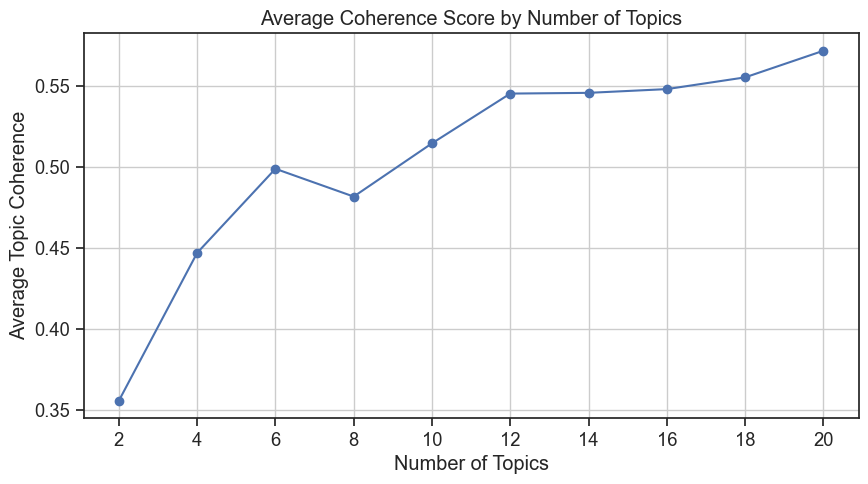

In [52]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt
import tomotopy as tp

def calculate_coherence_scores(training_data, start, end, step, iterations=100, train_step=10):
    coherence_scores = {}

    for k in range(start, end + 1, step):
        model = tp.LDAModel(k=k)

        for text in training_data:
            model.add_doc(words=text.split())

        for i in range(0, iterations, train_step):
            model.train(train_step)

        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherence_scores[k] = average_coherence
        print(f"Number of Topics: {k}, Coherence Score: {average_coherence}")

    return coherence_scores

def plot_coherence_scores(coherence_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Topic Coherence')
    plt.xticks(list(coherence_scores.keys()))
    plt.grid(True)
    plt.show()

coherence_scores = calculate_coherence_scores(training_data, start=2, end=20, step=2)
plot_coherence_scores(coherence_scores)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [63]:
def get_top_docs(docs, topic_distributions, topics, topic_index, n=5):
    # Check if the selected topic index is valid
    if topic_index >= len(topic_distributions):
        print(f"Error: Topic index {topic_index} is out of range. Number of topics in the model: {len(topic_distributions)}")
        return
    
    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

# Display 3 documents for topic 1，2，3，4

topics_of_interest = [1, 2, 3, 4]  

# Loop through the topics of interest and display the top documents for each topic
for topic_id in topics_of_interest:
    print(f"Top documents for Topic {topic_id}:")
    get_top_docs(original_texts, topic_distributions, topics, topic_index=topic_id, n=3)


Top documents for Topic 1:


### ✨Topic 1✨

fbi trump russia democrats amp collusion witch mueller hunt president



---


✨  
**Topic Probability**: 0.9365617632865906  
**Document**:  the rigged russian **witch** **hunt** goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no **collusion**!



✨  
**Topic Probability**: 0.9365617632865906  
**Document**:  my friend and very early supporter kris kobach won the republican nomination for governor of kansas last night in a tough race against a very fine opponent. kris will win in november and be a great governor. he has my complete and total endorsement!



✨  
**Topic Probability**: 0.9233226776123047  
**Document**:  @lindseygrahamsc  “why didn’t the **fbi** tell **president** **trump** that they had concerns about carter page? is there a double standard here?” they told senator diane feinstein that she had a spy - but not **trump**. is that entrapment or did they just want to use page as an excuse to spy?



Top documents for Topic 2:


### ✨Topic 2✨

trump election president people votes vote fraud voting voter ballots



---


✨  
**Topic Probability**: 0.9025649428367615  
**Document**:  i want to defend &amp; preserve our nation’s historic values. our opponents stand with rioters – i stand with the heroes of law enforcement. biden says antifa is just an idea. ideas don’t assault cops &amp; burn down buildings. antifa is a domestic terrorist org. https://t.co/zsnrj8daqo



✨  
**Topic Probability**: 0.8765105605125427  
**Document**:  rt @senmcsallyaz: i spoke to arizonans during a telephone town hall earlier this week about what’s happening in our country right now. (1/4) https://t.co/3qazua4ol3



✨  
**Topic Probability**: 0.8573434352874756  
**Document**:  https://t.co/zwgbeynhy3



Top documents for Topic 3:


### ✨Topic 3✨

care health people right country every americans must insurance united



---


✨  
**Topic Probability**: 0.9612001180648804  
**Document**:  rt @repdougcollins: .@speakerpelosi will stop at nothing to take down @realdonaldtrump.  first it was the russia hoax, then sham impeachment. now she’s trying to invoke the 25th amendment because he... fully recovered from the coronavirus?  we won’t let her get away with it. https://t.co/l9frpfpync



✨  
**Topic Probability**: 0.9112164974212646  
**Document**: my staff went to the offices of my senate colleagues to share a new un report showing that 233,000 **people** will die as a result of the saudi-led war in yemen by 2019.
 
if we override trump's veto of our resolution and end u.s. support for this war, we can save thousands of lives. https://t.co/gncdo5x3ym



✨  
**Topic Probability**: 0.9018505215644836  
**Document**: in 2002 i voted against the creation of dhs and the establishment of ice. that was the **right** vote. now, it is time to do what **americans** overwhelmingly want: abolish the cruel, dysfunctional immigration system we have today and pass comprehensive immigration reform.



Top documents for Topic 4:


### ✨Topic 4✨

great endorsement total strong complete military vote amp amendment vets



---


✨  
**Topic Probability**: 0.9389321804046631  
**Document**:  rt @rasmussen_poll: today’s @realdonaldtrump approval ratings among black voters: 29%   this time last year: 15%  https://t.co/mazbcwoimy @potus @realdonaldtrump https://t.co/83oduvxddf



✨  
**Topic Probability**: 0.9389321804046631  
**Document**:  more fake news. this was photoshopped, obviously, but the wind was **strong** and the hair looks good? anything to demean! https://t.co/t8ptymcyhf



✨  
**Topic Probability**: 0.9347145557403564  
**Document**:  i have authorized an emergency disaster declaration to provide hawaii the necessary support ahead of #hurricanelane. our teams are closely coordinating with the state and local authorities. you are in our thoughts! https://t.co/lrhwbduavj



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Topic 1: Representative tweets are about the "Russian witch hunt," endorsements for political allies, and criticisms of the FBI's handling of investigations.
These topics align more closely with Trump's views, as they involve defending against allegations of collusion and endorsing fellow Republicans.

Topic 2: Tweets in this topic focus on defending law enforcement, supporting American values, and condemning rioters.
These topics reflect Trump's stance on law and order, patriotism, and support for law enforcement agencies.

Topic 3: Topics include criticism of Speaker Pelosi's actions, concerns about the impact of U.S. involvement in foreign conflicts, and calls for immigration reform.
These topics are consistent with Sanders' views, as they emphasize criticisms of political opponents, anti-war sentiments, and advocacy for progressive policies like immigration reform.

Topic 4: Representative tweets involve sharing approval ratings among black voters, addressing fake news allegations, and authorizing disaster relief for Hawaii.
These topics are more representative of Trump's views, focusing on communication about public opinion, addressing media criticisms, and providing government responses to emergencies.


Overall, while some topics may contain tweets from both politicians, others clearly align more closely with the views and priorities of one politician over the other. These distinctions arise from differences in their political ideologies, policy positions, and communication strategies. Trump's tweets tend to focus more on defending against allegations, endorsing allies, and addressing law and order issues, while Sanders' tweets often center around criticizing political opponents, advocating for progressive policies, and addressing social justice concerns.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [57]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

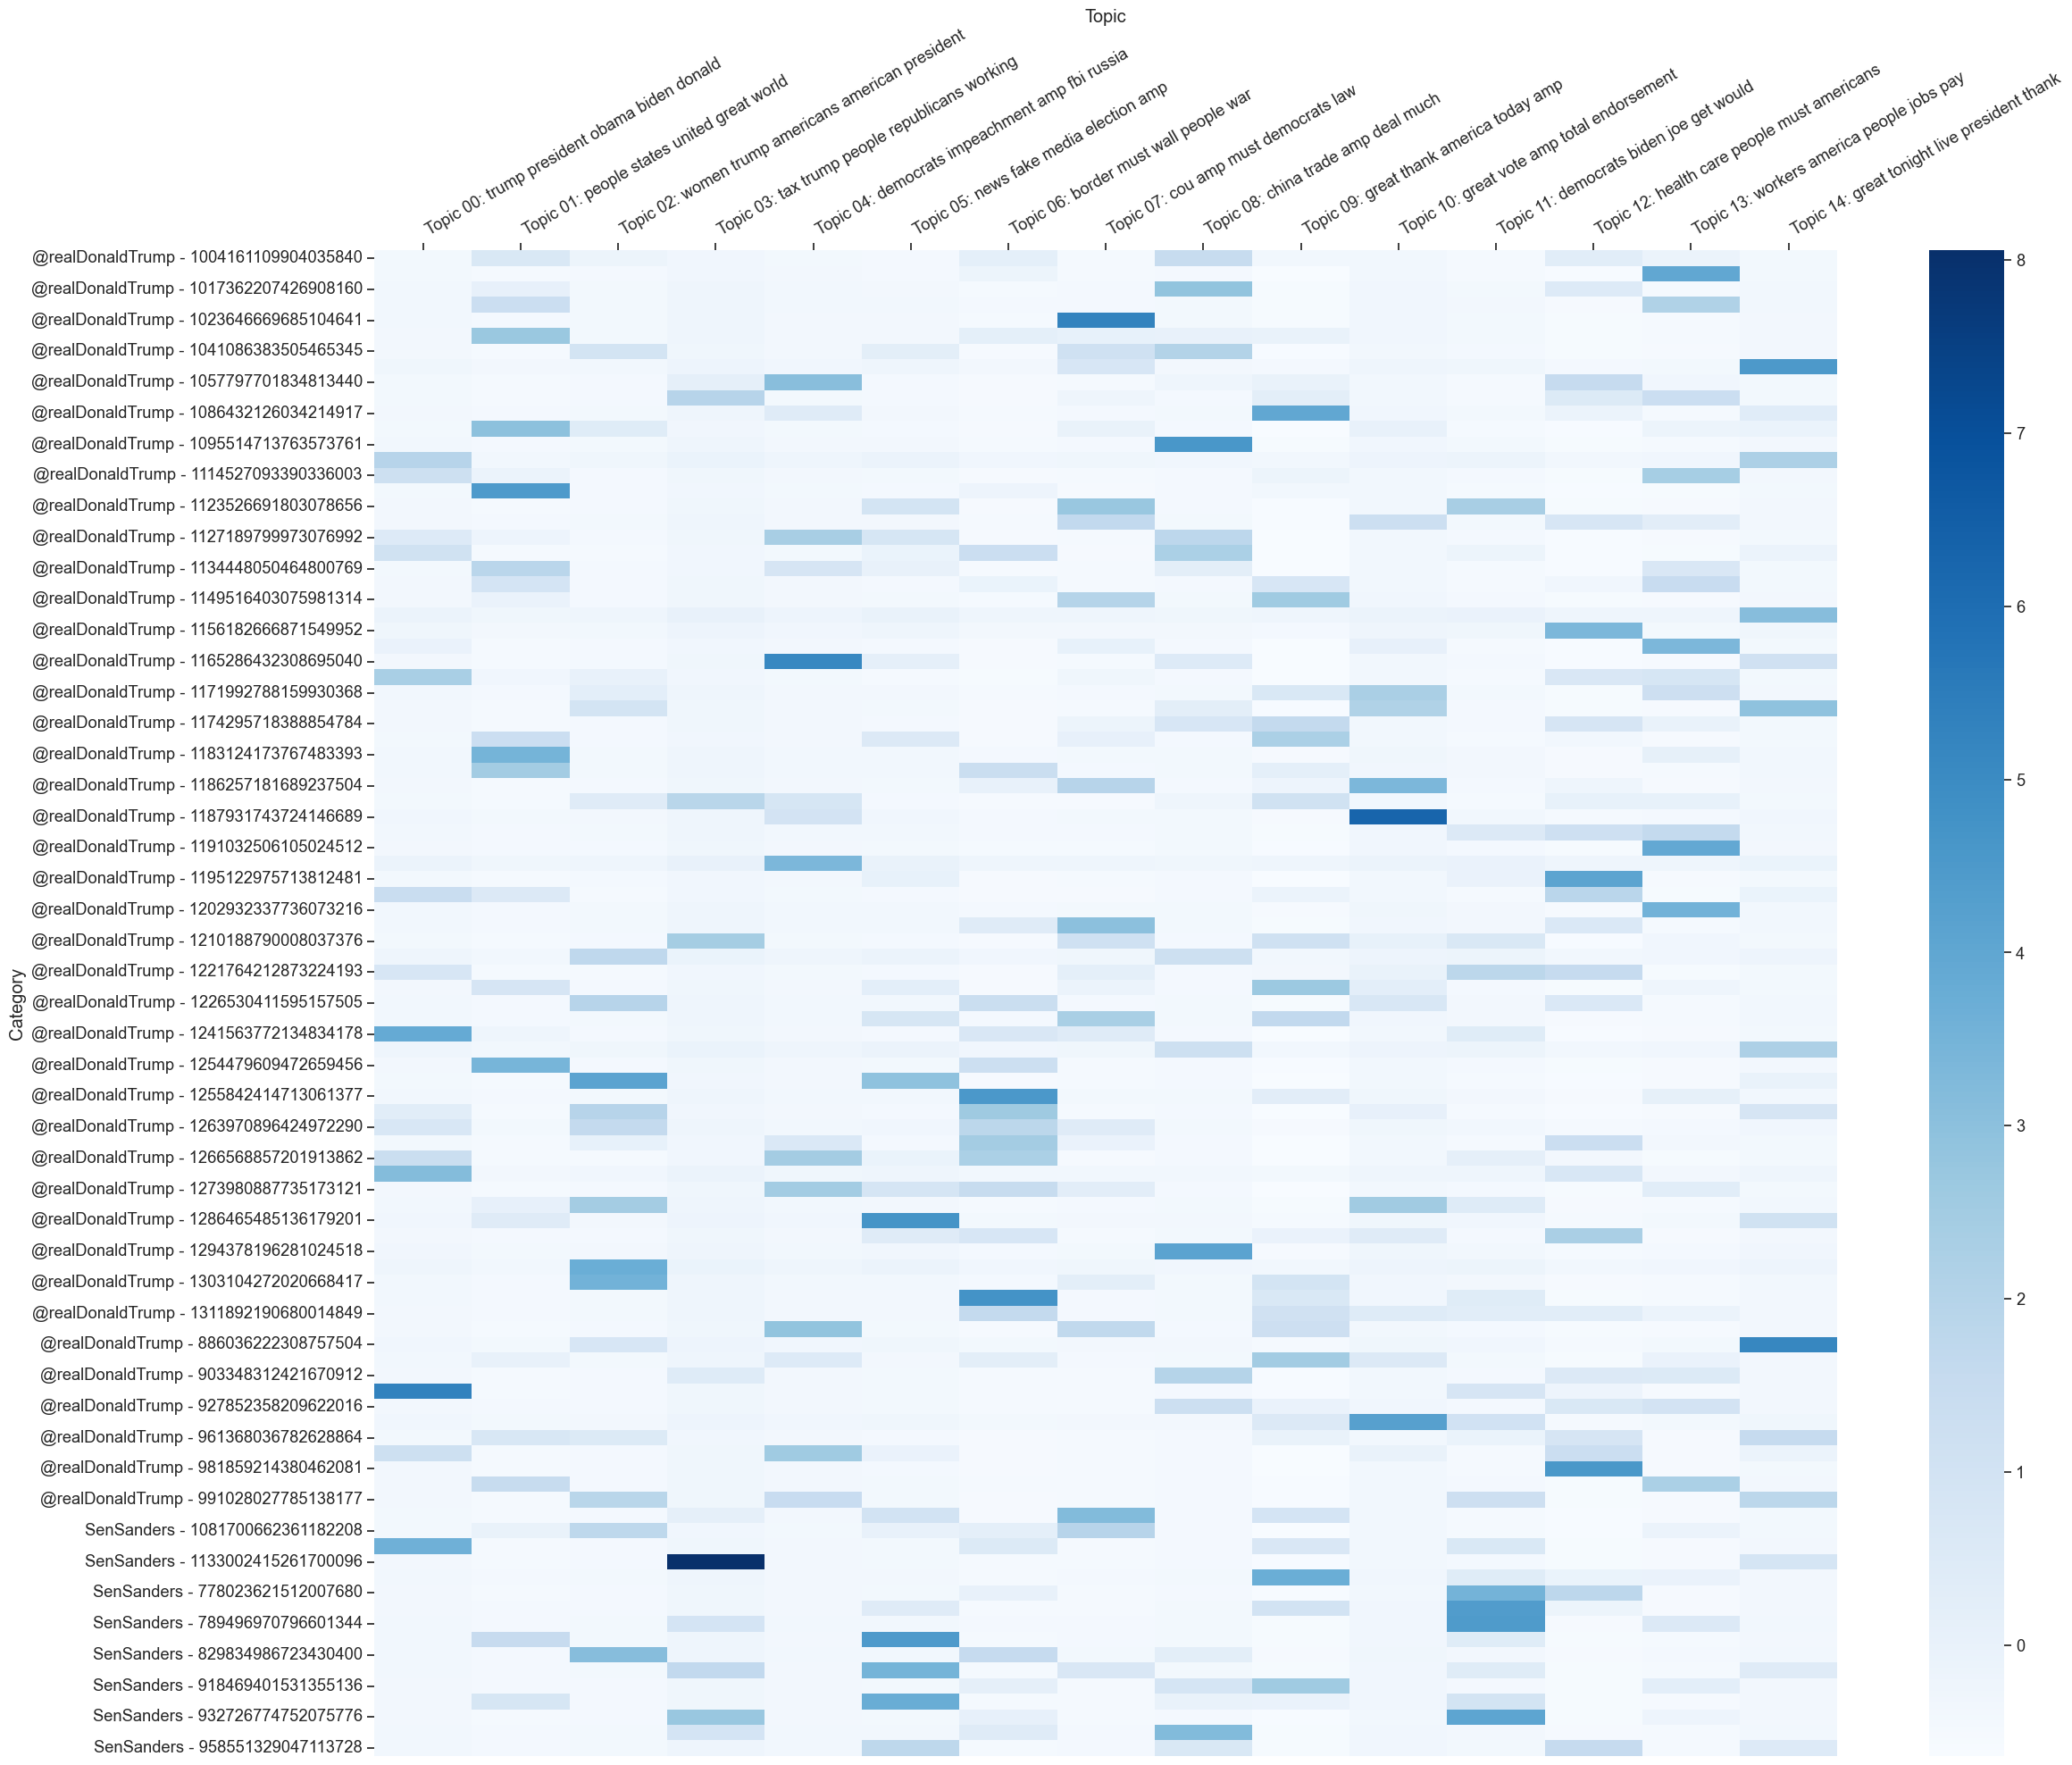

In [58]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=25):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(25,20))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
The colors in the heatmap range from light (low probability) to dark (high probability), corresponding to how strongly a particular topic is represented in each tweet. If certain topics have consistently higher probabilities for one politician compared to the other, that would suggest those topics are more characteristic or prioritized by that politician in their public communication.

For Trump:

Topic 1: This topic includes keywords related to impeachment, Democrats, and elections, which align with Trump's frequent criticisms of Democrats and the impeachment proceedings against him.
Topic 2: Keywords like "democrats," "border," and "wall" suggest a focus on immigration and border security, which are key issues in Trump's platform.
Topic 4: Words like "great," "thank," and "America" are consistent with Trump's messaging emphasizing national pride and achievements.


For Sanders:

Topic 0: Terms such as "jobs," "economy," and "workers" indicate a focus on economic issues and workers' rights, which are central to Sanders' platform.
Topic 9: Keywords like "health care," "tax," and "Americans" suggest discussions around healthcare and taxation, key topics in Sanders' policy proposals.
Topic 14: Words like "people," "country," and "American" reflect themes of populism and national unity, which are often emphasized in Sanders' rhetoric.


These associations are based on the keywords provided for each topic and the typical themes and priorities associated with each politician's messaging and policy positions.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [90]:
# Sample 50 tweets from each author
sample_trump = trump_tweets.sample(n=50, random_state=42)
sample_sanders = sanders_tweets.sample(n=50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([sample_trump, sample_sanders], ignore_index=True)

# Check the shape of the balanced sample
print("Balanced sample shape:", balanced_sample.shape)

Balanced sample shape: (100, 4)


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map='Blues',
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                if _topic_index < len(topic_keys):  # Check if _topic_index is within range of topic_keys
                    dicts_to_plot.append({'Probability': float(_probability),
                                          'Category': _label,
                                          'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe from the dictionaries.
    import pandas as pd
    df_to_plot = pd.DataFrame(dicts_to_plot)

    # Pivot the dataframe to wide format and normalize the columns.
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()
    # Calculate summary statistics
    summary_stats = df_norm_col.describe()
    print(summary_stats)

    # Visualize the data using box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_norm_col)
    plt.title('Box Plot of Normalized Topic Distributions')
    plt.xlabel('Topics')
    plt.ylabel('Normalized Probability')
    plt.xticks(rotation=45)
    plt.show()